<a href="https://colab.research.google.com/github/Tmassli96/Analysis-Projects/blob/main/Data_on_Data_Analysts_A_Deep_Dive_into_the_US_Job_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Overview**

###**Data on Data Analysts: A Deep Dive into the US Job Market**

- Welcome to my analysis of the data analyst job market in the US. This project was created out of a desire to navigate and understand job opportunities more effectively. It explores the top-paying and most in-demand skills to help identify the best career opportunities for data analysts in the US.

- The data comes from Luke Barousse's Python Course, which serves as the foundation for this analysis. It includes detailed information on job titles, salaries, locations, and essential skills. Through a series of Python scripts, I explore key questions such as the most demanded skills, salary trends, and how demand and salary intersect in the US data analyst job market.

##**Import & Clean Up Data**##

In [ ]:
#Importing the essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install datasets --upgrade
import datasets
print(datasets.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [ ]:
#Loading the data into a Data frame.
from datasets import load_dataset
luke_data=load_dataset('lukebarousse/data_jobs')
luke_df= pd.DataFrame(luke_data['train'])
df=luke_df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [ ]:
#Convert string date to datetime
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

#convert string to list
import ast
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if  pd.notna(x) else x)

df1=df.copy()

In [ ]:
df1.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [ ]:
df1.shape

(785741, 17)

##**Exploratory Data Analysis on US Data Analyst Jobs**

##**Job Counts by Location**

In [ ]:
# Filter by US Data Analyst jobs
us_da=df1[(df1['job_country']=='United States')&(df['job_title_short']=='Data Analyst')]

In [ ]:
us_da.shape

(67816, 17)

In [ ]:
us_da.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."


In [ ]:
us_da.isnull().sum()

,0
job_title_short,0
job_title,0
job_location,234
job_via,7
job_schedule_type,709
job_work_from_home,0
search_location,0
job_posted_date,0
job_no_degree_mention,0
job_health_insurance,0


In [ ]:
us_da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67816 entries, 36 to 785705
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        67816 non-null  object        
 1   job_title              67816 non-null  object        
 2   job_location           67582 non-null  object        
 3   job_via                67809 non-null  object        
 4   job_schedule_type      67107 non-null  object        
 5   job_work_from_home     67816 non-null  bool          
 6   search_location        67816 non-null  object        
 7   job_posted_date        67816 non-null  datetime64[ns]
 8   job_no_degree_mention  67816 non-null  bool          
 9   job_health_insurance   67816 non-null  bool          
 10  job_country            67816 non-null  object        
 11  salary_rate            8442 non-null   object        
 12  salary_year_avg        4350 non-null   float64       
 13  sala

In [ ]:
us_da.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,67816,4350.000000,3980.000000
mean,2023-06-15 03:16:27.397118464,94553.964924,38.312172
min,2023-01-01 00:00:04,25000.000000,8.000000
25%,2023-03-12 18:02:09.750000128,71262.500000,24.000000
50%,2023-06-11 18:49:23.500000,90000.000000,33.000000
75%,2023-09-08 19:01:58.249999872,112500.000000,50.000000
max,2023-12-31 23:31:54,375000.000000,391.000000
std,NaN,33248.650655,18.758708


In [ ]:
#Jobs locations in the dataset
us_locations =us_da['job_location'].value_counts().iloc[0:10]
us_locations

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


In [ ]:
#Series need to conver to DataFrame
print(type(us_locations))

<class 'pandas.core.series.Series'>


In [ ]:
us_locations=pd.DataFrame(us_locations)
print(type(us_locations))

<class 'pandas.core.frame.DataFrame'>


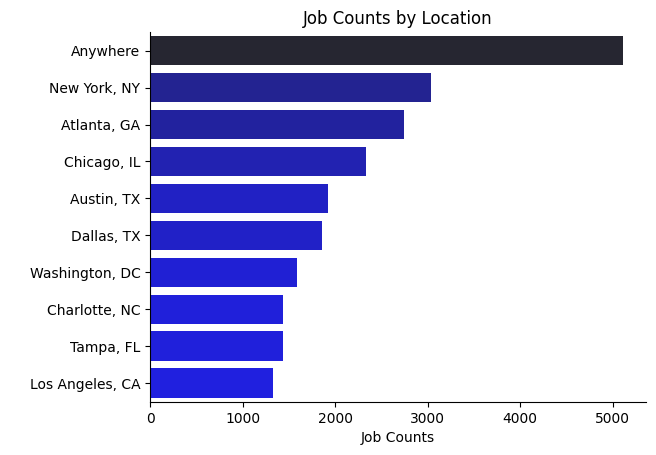

In [ ]:
#Horizontal bar plot of job counts by location
sns.barplot(data=us_locations, x='count',y=us_locations.index,hue='count',linewidth=2.5,palette='dark:b_r',legend=False)
sns.set_theme(style='ticks')

#removes the borders around the graph
sns.despine()

# labels and title
plt.xlabel('Job Counts')
plt.ylabel(' ')
plt.title('Job Counts by Location')

plt.show()

##**Explore Work from Home Offered,Degree Requierd & Health Insureance Offered**

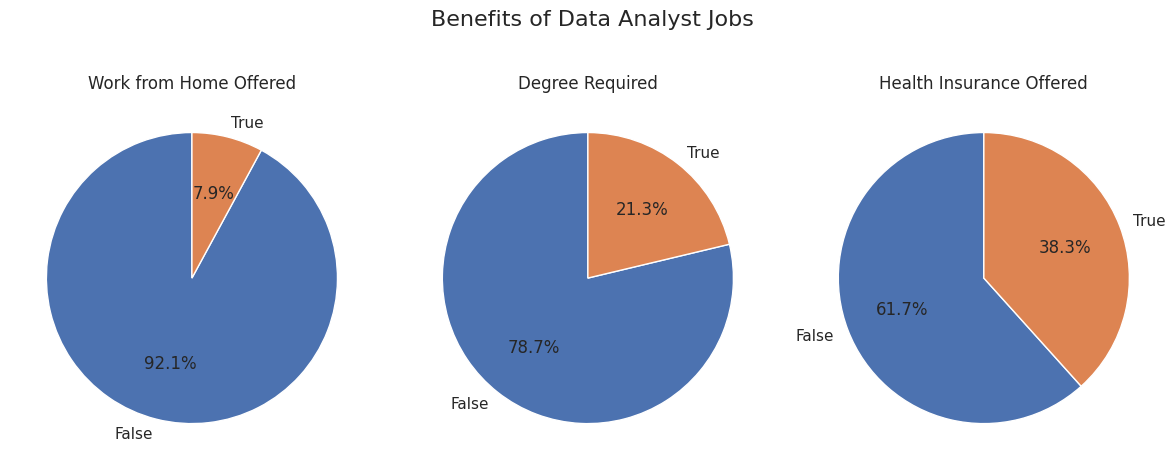

In [ ]:
dict_column={'job_work_from_home':'Work from Home Offered',
             'job_no_degree_mention':'Degree Required',
             'job_health_insurance':'Health Insurance Offered'}

#Create subplots for boolean data analysis
fig,ax=plt.subplots(1,3,figsize=(12,10))

# Iterate through dictionary to create pie charts
for i,(row,title) in enumerate(dict_column.items()):
  values=us_da[row].value_counts()
  values.plot(kind='pie',title=title,ax=ax[i],startangle=90,autopct='%1.1f%%')
  ax[i].set_ylabel('')  # Remove default y-axis label for each subplot


plt.suptitle('Benefits of Data Analyst Jobs',fontsize=16, y=0.75)
fig.tight_layout()
plt.show()

# Interpretation of results
# The results indicate that most data analyst jobs are not remote (WFH), do not require a degree, and do not offer health insurance.

##**Top 10 Data Analyst Job Counts by Companies in US**

In [ ]:
#Explore the company name:
top_10_companies=us_da['company_name'].value_counts().iloc[0:10]
top_10_companies=pd.DataFrame(top_10_companies)

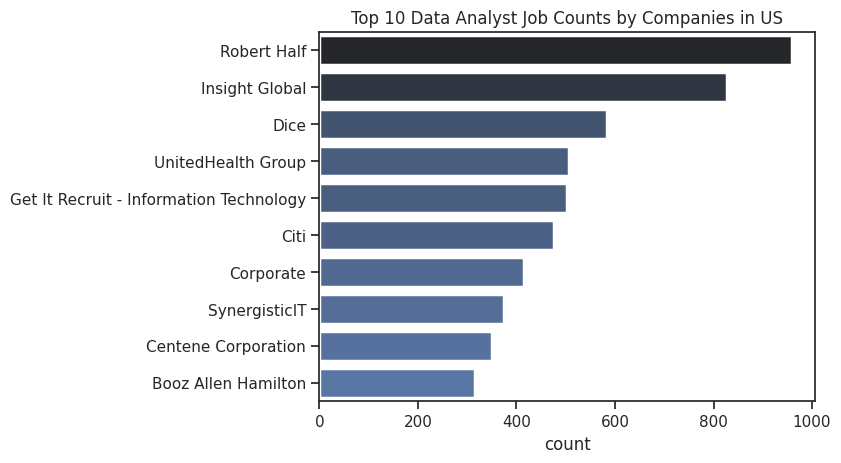

In [ ]:
# Create barplot
sns.barplot(data=top_10_companies,x='count',y=top_10_companies.index,hue='count',linewidth=2.5,palette='dark:b_r',legend=False)
sns.set_theme(style='ticks')
plt.title('Top 10 Data Analyst Job Counts by Companies in US')

plt.ylabel('')
plt.show()

##**Trending Top Skills for Data Analysts in the US**

In [ ]:
df2=df.copy()

# Explode the 'job_skills' column to create separate rows for each skill
df2=df2.explode('job_skills')
us_da2=df2[(df2['job_title_short']=='Data Analyst') & (df2['job_country']=='United States')]

In [ ]:
us_da2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254289 entries, 36 to 785705
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        254289 non-null  object        
 1   job_title              254289 non-null  object        
 2   job_location           253382 non-null  object        
 3   job_via                254247 non-null  object        
 4   job_schedule_type      251930 non-null  object        
 5   job_work_from_home     254289 non-null  bool          
 6   search_location        254289 non-null  object        
 7   job_posted_date        254289 non-null  datetime64[ns]
 8   job_no_degree_mention  254289 non-null  bool          
 9   job_health_insurance   254289 non-null  bool          
 10  job_country            254289 non-null  object        
 11  salary_rate            31469 non-null   object        
 12  salary_year_avg        17440 non-null   float64 

In [ ]:
# Create month_num column by extracting the month from job_posted_date column
us_da2['month_num']=us_da2['job_posted_date'].dt.month
us_da2.head(5)

In [ ]:
# Create pivot table to count job postings by month and skill
us_da_pv=us_da2.pivot_table(index='month_num',columns='job_skills',aggfunc='size',fill_value=0)
us_da_pv

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
month_num,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [ ]:
# Add a Total row to sum job postings for each skill across all months
us_da_pv.loc['Total']=us_da_pv.sum()
us_da_pv

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
month_num,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [ ]:
#Sort Data by row:
us_da_pv=us_da_pv[us_da_pv.loc['Total'].sort_values(ascending=False).index]
#Drop the Total row as it is sorted now:
us_da_pv=us_da_pv.drop('Total')
us_da_pv

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
month_num,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#We want to convert values into a % relative to all job positngs
us_da_per=df[(df['job_country']=='United States')&(df['job_title_short']=='Data Analyst')]
us_da_per['month_num']=us_da_per['job_posted_date'].dt.month

da_total=us_da_per.groupby('month_num').size()
da_total

In [ ]:
us_da_pv

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
month_num,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Calculate percentage of job postings for each skill by month
us_da_perc=us_da_pv.div(da_total/100,axis=0)
us_da_perc

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
month_num,,,,,,,,,,,,,,,,,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082
4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028,0.000000,0.000000,0.000000,0.000000
6,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.000000,0.000000,0.017596,0.000000,0.000000,0.017596,0.017596,0.000000,0.000000
7,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Select top 5 columns of the percentage table
us_da_perc=us_da_perc.iloc[:,0:5]
us_da_perc

job_skills,sql,excel,tableau,python,sas
month_num,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166
2,51.730895,42.243632,27.367734,26.420640,19.790986
3,51.881634,42.795111,29.012544,27.066581,19.909939
4,53.231939,42.139197,29.575136,27.756654,21.524219
5,51.692369,42.419387,28.680152,27.017825,19.467254
6,50.360725,41.914482,28.646841,28.312511,17.314799
7,50.163430,40.722938,29.475101,27.648529,19.150163
8,51.462165,41.166717,29.409105,30.524570,19.234248
9,49.471869,38.823022,29.165768,26.492779,18.452253


In [ ]:
# Reset the index, convert month numbers to month names & set month as the new index

us_da_perc=us_da_perc.reset_index()
us_da_perc['month_num'] = pd.to_datetime(us_da_perc['month_num'], format='%m').dt.strftime('%b')
us_da_perc=us_da_perc.set_index('month_num',drop=True)
us_da_perc.index.name = "Month"
us_da_perc

job_skills,sql,excel,tableau,python,sas
Month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


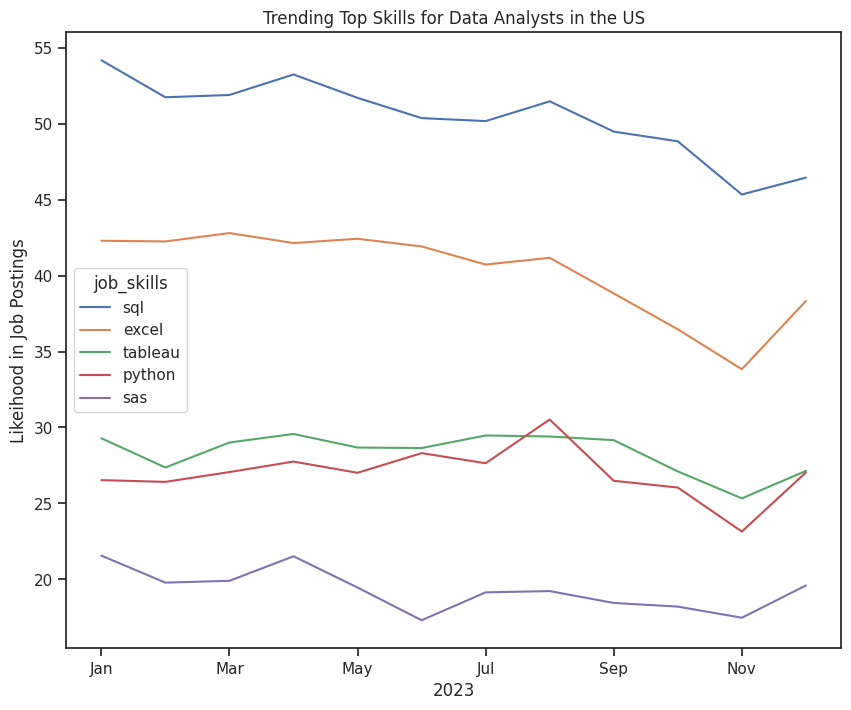

In [ ]:
# Plot the trending top skills for Data Analysts in the US over the months

us_da_perc.plot(kind='line',figsize=(10,8))
plt.title('Trending Top Skills for Data Analysts in the US')
plt.xlabel('2023')
plt.ylabel('Likeihood in Job Postings')

plt.show()

##**Most Optimal Skills for Data Analysts in the US**

In [ ]:
# Filter for Data Analyst jobs in the United States and drop rows with missing salaries

df_da_us=df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()
df_da_us=df_da_us.dropna(subset='salary_year_avg')

# Explode the 'job_skills' column to create a row for each skill
df_da_us_exp=df_da_us.explode('job_skills')
df_da_us_exp[['salary_year_avg','job_skills']].head(10)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
180,90250.0,powerpoint
410,133285.0,sql
410,133285.0,word
410,133285.0,excel
410,133285.0,visio


In [ ]:
# Group by 'job_skills' and calculate the count and median salary for each skill
df_DA_skills=df_da_us_exp.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills=df_DA_skills.rename(columns={'count':'skill_count','median':'median_salary'})
df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [ ]:
# Calc the total number of Data Analyst job postings in the United States
Da_job_count=len(df_da_us)
Da_job_count

4350

In [ ]:
# Calc the % of job postings for each skill

df_DA_skills['skill_percent']=df_DA_skills['skill_count']/(Da_job_count/100)
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [ ]:
# Select the top 10 skills
df_DA_skills=df_DA_skills.iloc[0:10]
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [ ]:
pip install adjustText

Text(0.5, 1.0, 'Most Optimal Skills for Data Analyss in the US')

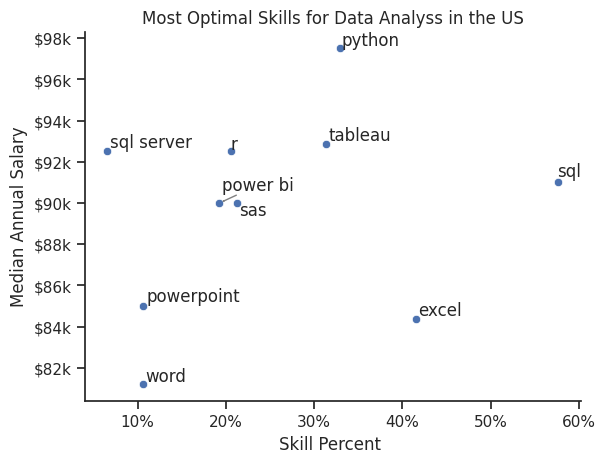

In [ ]:
# Create a scatter plot for skill percentage vs. median salary

from adjustText import adjust_text
import matplotlib.ticker as mtick

sns.set_theme(style='ticks')
sns.scatterplot(data=df_DA_skills,x='skill_percent',y='median_salary')
sns.despine()

texts=[]
for i,txt in enumerate(df_DA_skills.index):
  texts.append(plt.text(df_DA_skills['skill_percent'].iloc[i],df_DA_skills['median_salary'].iloc[i],txt))

  #Adjust text to avoid overlap
adjust_text(texts,arrowprops=dict(arrowstyle='->',color='gray'))

ax=plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.0f}%'))


plt.xlabel('Skill Percent ')
plt.ylabel('Median Annual Salary')
plt.title('Most Optimal Skills for Data Analyss in the US')